In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model

In [62]:
data = pd.read_csv("50_Startups.csv")

In [63]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [64]:
data.shape

(50, 5)

In [65]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [66]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [67]:
data.duplicated().sum()

np.int64(0)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [69]:
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
correlation_matrix


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


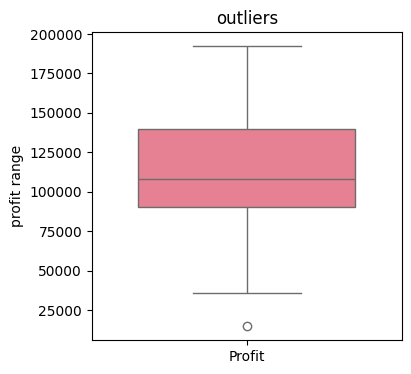

In [70]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [4,4]
sns.boxplot(data=data[outliers],orient="v", palette="husl" ,width=0.7)
plt.title("outliers")
plt.ylabel("profit range")
 
plt.show()


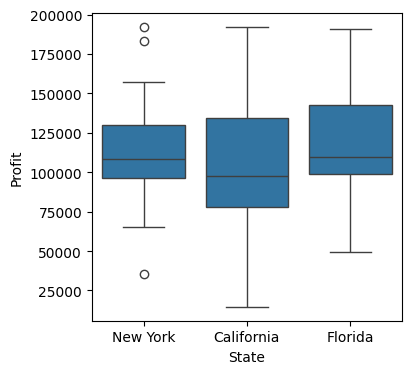

In [27]:
sns.boxplot(x='State' , y='Profit' , data=data)
plt.show() 

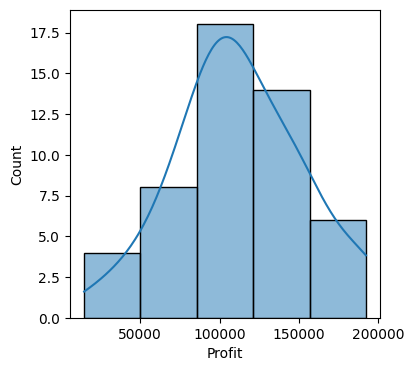

In [72]:
sns.histplot(data['Profit'],bins=5,kde=True)
plt.show()

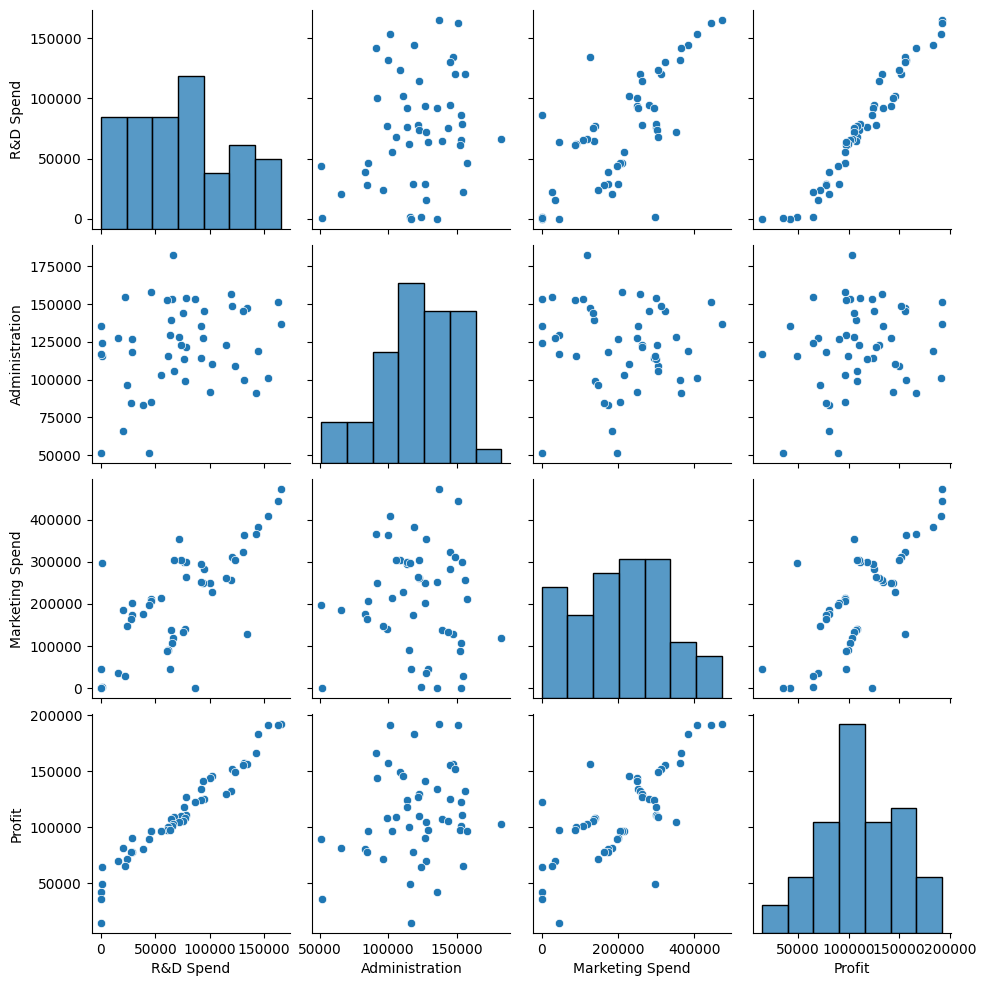

In [35]:
sns.pairplot(data)
plt.show()

In [38]:
x= data[["R&D Spend","Administration","Marketing Spend"]]
y = data["Profit"]
x=x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)

    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
yperd = model.predict(xtest)
data = pd.DataFrame(data={"predacted Profite" : yperd.flatten()})
print(data.head())

   predacted Profite
0      125972.148263
1       85471.922710
2       98924.151683
3       46639.786287
4      128142.124732


In [49]:
testing_data_model_score = model.score(xtest,ytest)
print("Model Score/ preformance on Testiong data ", testing_data_model_score)

training_data_model_score = model.score(xtest,ytest)
print("Model Score/ preformance on Training data ", training_data_model_score)

Model Score/ preformance on Testiong data  0.9418819530700165
Model Score/ preformance on Training data  0.9418819530700165


In [50]:
df = pd.DataFrame(data={'predicted value': yperd.flatten(),'Actual values':ytest.flatten()})
df

,predicted value,Actual values
0,125972.148263,134307.35
1,85471.922710,81005.76
2,98924.151683,99937.59
3,46639.786287,64926.08
4,128142.124732,125370.37
5,52602.190537,35673.41
6,108364.697602,105733.54
7,100331.588469,107404.34
8,97538.566747,97427.84
9,112496.703984,122776.86


In [73]:
from sklearn.metrics import r2_score

r2_score = r2_score(yperd,ytest)
print("R2 Score of model is ",r2_score*100)

R2 Score of model is  93.55141378867276


In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yperd,ytest)
print("Mean squarred Error is :" , mse*100)

Mean squarred Error is : 8177214943.547146


In [53]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(yperd,ytest)
print("Mean Absolute Error is :", mae)

Mean Absolute Error is : 7222.594346965514
